# Laboratorio: Análisis y Modelado de Series Temporales con SARIMAX

En este laboratorio, practicarás el análisis y modelado de series temporales utilizando el modelo SARIMAX. 
Objetivos del laboratorio

- Analizar series temporales:
	
    - Identificar tendencias, estacionalidad y posibles rupturas estructurales en los datos.
	
    - Verificar la estacionaridad de la serie mediante pruebas estadísticas y visuales.
	
    - Realizar análisis de autocorrelación (ACF) y autocorrelación parcial (PACF).

- Modelar la serie temporal:
	
    - Ajustar un modelo SARIMAX adecuado para los datos proporcionados.
	
    - Evaluar los resultados del modelo e interpretar los parámetros obtenidos.

- Interpretar gráficas y resultados:
	
    - Explicar de forma detallada el significado de las gráficas y resultados generados durante cada etapa del análisis.

# Instrucciones

- Parte 1: Carga y exploración inicial de los datos

    - Descarga el conjunto de datos proporcionado, que contiene una serie temporal de valores relacionados con ventas mensuales de una empresa ficticia durante los últimos 5 años.

    - Realiza una exploración inicial:

        - Gráfica la serie temporal completa para identificar posibles tendencias y estacionalidades.

        - Comenta tus observaciones iniciales sobre los patrones que encuentres.

- Parte 2: Estacionaridad


    - Evalúa si la serie es estacionaria:

    - Aplica el test de Dickey-Fuller aumentado (ADF).

    - Si es necesario, realiza transformaciones (diferenciación o logaritmos) para convertir la serie en estacionaria.

    - Genera una gráfica comparativa que muestre la serie original y la transformada, indicando las diferencias visuales.

    - Escribe una interpretación de los resultados del test ADF y de la gráfica.

- Parte 3: Análisis de autocorrelaciones


    - Genera los gráficos de ACF (Autocorrelation Function) y PACF (Partial Autocorrelation Function).

    - Identifica:

        - El orden de diferenciación necesario (si aún no lo has hecho).

        - Los posibles valores para los parámetros p y q del modelo SARIMAX.

    - Explica qué indican las autocorrelaciones encontradas y cómo las utilizarás para definir los parámetros del modelo.

- Parte 4: Ajuste del modelo SARIMAX


    - Ajusta un modelo SARIMAX utilizando los parámetros identificados.

    - Evalúa el ajuste:

        - Observa los residuos del modelo.

        - Verifica si cumplen las condiciones de ruido blanco mediante análisis visual y pruebas estadísticas.

    - Ajusta el modelo si es necesario, iterando sobre los parámetros.

- Parte 5: Interpretación y predicción


    - Interpreta los coeficientes estimados del modelo (incluyendo estacionalidad y efectos externos si aplican).

    - Genera una predicción para los próximos 12 meses.

    - Gráfica las predicciones junto con la serie temporal original.

    - Comenta sobre:

        - La calidad de las predicciones.

        - La utilidad del modelo para la toma de decisiones.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

import sys
sys.path.append("../")
from src import soporte_sarima as se

# Configuraciones
# -----------------------------------------------------------------------
pd.options.display.float_format = '{:.0f}'.format
%load_ext autoreload
%autoreload 2


In [2]:
# # cargamos los datos
# df = pd.read_csv("../data/Truck_sales.csv", index_col= "Month-Year", parse_dates=True)
# df.index.name = "Date"
# df.head()

In [3]:
# cargamos los datos
df = pd.read_csv("../data/Truck_sales.csv")
df.head()

,Month-Year,Number_Trucks_Sold
0,03-Jan,155
1,03-Feb,173
2,03-Mar,204
3,03-Apr,219
4,03-May,223


In [4]:
df["Month-Year"] = pd.to_datetime(df["Month-Year"], format="%y-%b")
df.set_index("Month-Year", inplace=True)
df.index.name="Date"

In [5]:
df.head()

,Number_Trucks_Sold
Date,
2003-01-01,155
2003-02-01,173
2003-03-01,204
2003-04-01,219
2003-05-01,223


In [6]:
df_copia = df.copy().reset_index()
df_copia["Date"] = pd.to_datetime(df_copia["Date"])
df_copia["Month"] = df_copia["Date"].dt.month_name()
df_copia["Year"] = df_copia["Date"].dt.year
df_copia.head()

,Date,Number_Trucks_Sold,Month,Year
0,2003-01-01,155,January,2003
1,2003-02-01,173,February,2003
2,2003-03-01,204,March,2003
3,2003-04-01,219,April,2003
4,2003-05-01,223,May,2003


# Exploración de los Datos

In [7]:
df_copia.head()

,Date,Number_Trucks_Sold,Month,Year
0,2003-01-01,155,January,2003
1,2003-02-01,173,February,2003
2,2003-03-01,204,March,2003
3,2003-04-01,219,April,2003
4,2003-05-01,223,May,2003


In [8]:
# instanciamos la clase
analisis_st = se.TimeSeriesAnalysis(df_copia, temporal_column="Date", value_column="Number_Trucks_Sold")

analisis_st.exploracion_datos()

El número de filas es 144 y el número de columnas es 3

----------

No hay duplicados

----------

No hay valores nulos

----------

Estadísticas de las variables numéricas:


,count,mean,std,min,25%,50%,75%,max
Number_Trucks_Sold,144,429,189,152,274,406,560,958
Year,144,2008,3,2003,2006,2008,2011,2014


In [9]:
# comprobamos que sea una serie continua
analisis_st.comprobar_serie_continua()

La serie temporal es continua, no faltan meses.


## Tendencias y Estacionalidad

In [10]:
# visualizamos a ver si tenemos tendencia en nuestros datos
analisis_st.graficar_serie()

In [11]:
# visualizamos la media movil
analisis_st.graficar_media_movil(window=12)

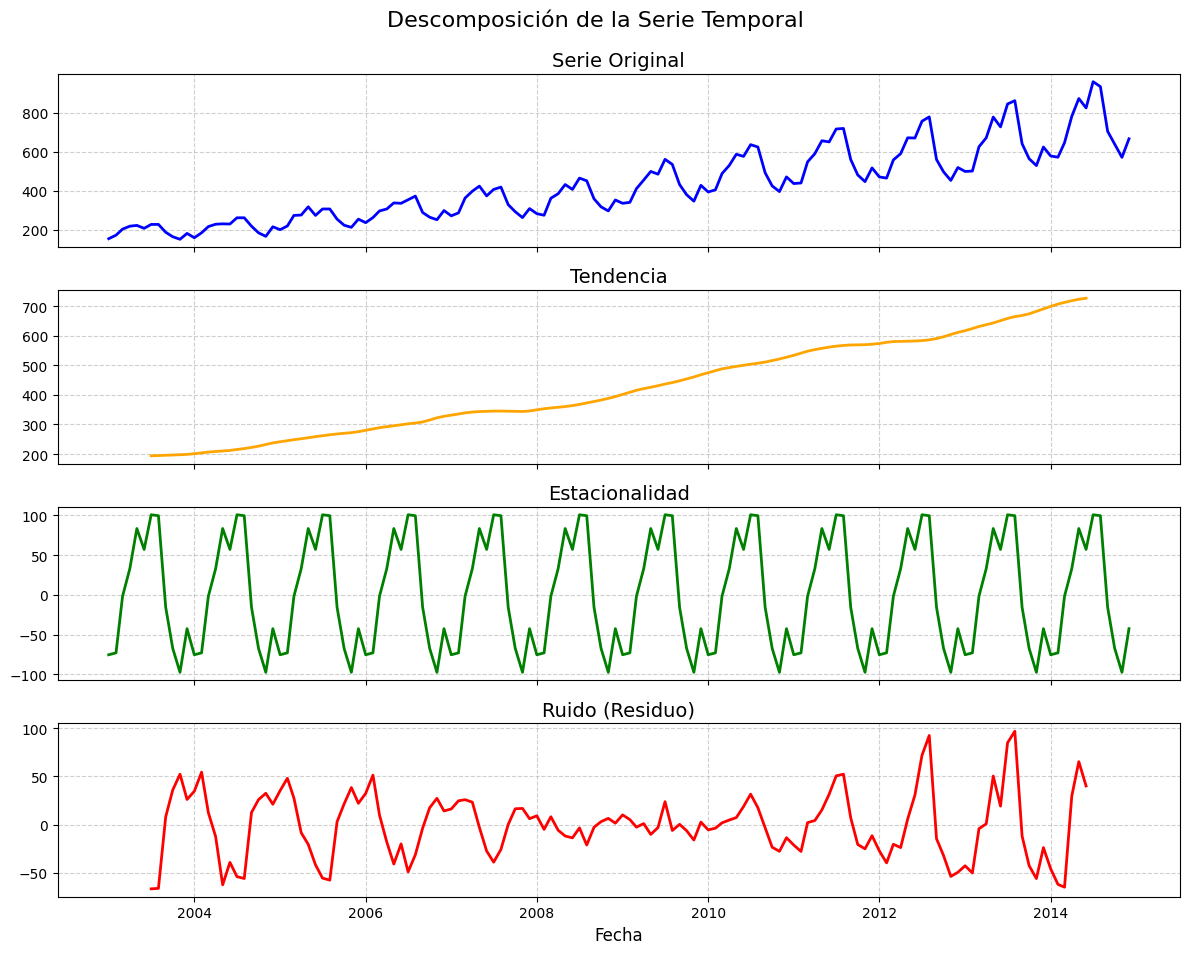

In [12]:
# vamos a ver si nuestros datos son estacionales
analisis_st.detectar_estacionalidad()

## Análisis de Autocorrelación

<Figure size 1200x1000 with 0 Axes>

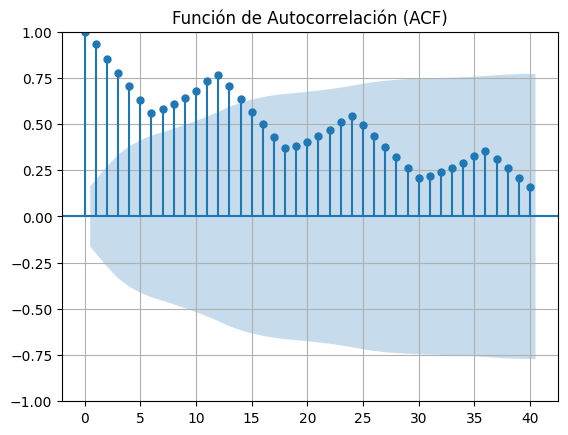

<Figure size 1200x1000 with 0 Axes>

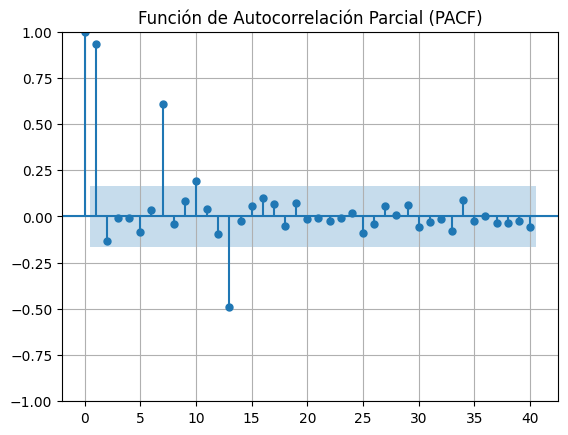

In [13]:
# Graficar ACF y PACF
analisis_st.graficar_acf_pacf(lags=40)

In [14]:
# Prueba de estacionariedad
analisis_st.prueba_estacionariedad()

ADF Statistic: 1.1158932574252591
p-value: 0.9953500083802601
Valores Críticos:
1%: -3.482087964046026
5%: -2.8842185101614626
10%: -2.578864381347275
No podemos rechazar la hipótesis nula. La serie NO es estacionaria.


# Preprocesamiento de los Datos


# SARIMAX

In [15]:
# lo primero que vamos a hacer es dividir los datos en test y train, pero ahora no podemos hacerlo de forma aleatoria ya que sino perderíamos la serie temporal
train_size = int(0.7 * len(df))
y_train, y_test = df[:train_size], df[train_size:]

In [16]:
y_train.index = pd.DatetimeIndex(y_train.index.values,
                               freq=y_train.index.inferred_freq)

In [17]:
sarima = se.SARIMAModel()

# Definir los rangos para los parámetros
p_range = range(1,8)
q_range = range(1,8)
seasonal_order_ranges = (
    range(2),  # P
    range(1),  # D
    range(2),  # Q
    [12]       # S
)

# Generar parámetros
parametros = sarima.generar_parametros(p_range, q_range, seasonal_order_ranges)
parametros[:5] # Ver algunas combinaciones

[(1, 1, (0, 0, 0, 12)),
 (1, 1, (0, 0, 1, 12)),
 (1, 1, (1, 0, 0, 12)),
 (1, 1, (1, 0, 1, 12)),
 (1, 2, (0, 0, 0, 12))]

100%|██████████| 196/196 [05:22<00:00,  1.65s/it]


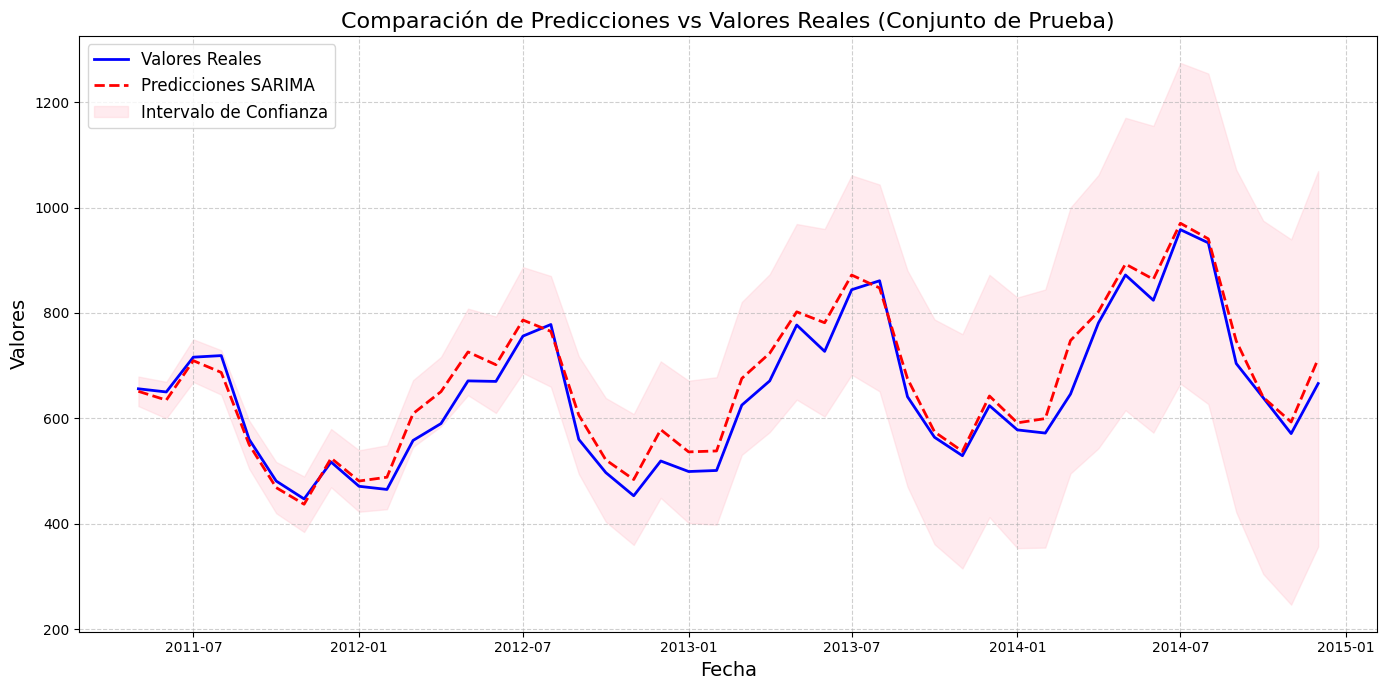

,p,q,seasonal_order,RMSE
178,7,3,"(1, 0, 0, 12)",35
146,6,2,"(1, 0, 0, 12)",35
46,2,5,"(1, 0, 0, 12)",36
14,1,4,"(1, 0, 0, 12)",37
22,1,6,"(1, 0, 0, 12)",39


In [18]:
# Evaluar modelos
results_df = sarima.evaluar_modelos(y_train, y_test, parametros, diferenciacion=1, df_length=len(df), variable="Number_Trucks_Sold")

# Ordenar resultados por RMSE
results_df = results_df.sort_values(by="RMSE", ascending=True)
results_df.head()